In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
from IPython.display import Image  
from sklearn import tree
import pydotplus
import itertools

# Модели с абсолютными величинами

In [2]:
def imp(clf_grid, feature_names):
    importances = clf_grid.best_estimator_.feature_importances_
    #print(clf_grid.best_estimator_)
    if isinstance(clf_grid.best_estimator_, collections.Iterable):
        std = np.std([clf_grid.best_estimator_.feature_importances_ for tree in clf_grid.best_estimator_],
             axis=0)
    else:
        std = clf1.best_estimator_.feature_importances_
    #print(std)
    indices = np.argsort(importances)[::-1]
    d = {'importance': importances, 'name_feature': feature_names}
    
    # Print the feature ranking
    df_importance = pd.DataFrame(data=d)
    df_importance = df_importance.sort_values(by=['importance'], ascending=False)
    print("Feature ranking:")

    print(df_importance)

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="g")
    plt.xticks(range(X.shape[1]), df_importance['name_feature'], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [3]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures_simple1000_1.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [4]:
df[['name', 'grade1', 'grade2', 'num_tokens', 'num_acl', 'num_acl_relcl', 'num_advcl',
'num_sents', 'num_cl', 'num_tu', 'num_ctu',
'num_coord', 'poss', 'prep_ph', 'adj_n', 'ger_inf',
'part_n', 'n_inf', 'num_vp',
'min_depth', 'max_depth', 'num_np', 'nan']] = df['h'].str.split('\t',expand=True)

In [5]:
df.head()

,h,name,grade1,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,...,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,nan
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1....,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,55,aver,186,2,3,2,7,13,...,34,6,12,2,0,12,4,6,67,
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1....,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,50,aver,195,4,2,1,10,14,...,36,1,3,1,0,17,3,8,60,
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1....,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,75,best,271,5,1,3,11,23,...,33,3,6,3,1,19,2,8,66,
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1....,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,55,aver,218,3,0,1,10,14,...,46,3,2,0,0,12,3,11,78,
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1....,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,60,aver,190,2,0,3,9,13,...,39,4,2,1,2,15,3,6,64,


In [6]:
df = df.drop(['h','nan', 'grade1'], axis=1)

In [7]:
df.head()

,name,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,...,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,aver,186,2,3,2,7,13,13,0,...,13,34,6,12,2,0,12,4,6,67
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,aver,195,4,2,1,10,14,14,0,...,19,36,1,3,1,0,17,3,8,60
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,best,271,5,1,3,11,23,23,0,...,21,33,3,6,3,1,19,2,8,66
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,aver,218,3,0,1,10,14,14,0,...,27,46,3,2,0,0,12,3,11,78
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,aver,190,2,0,3,9,13,13,0,...,18,39,4,2,1,2,15,3,6,64


In [8]:
len(df[df.grade2 == 'aver'])

928

In [9]:
len(df[df.grade2 == 'best'])

76

In [10]:
len(df[df.grade2 == 'worst'])

52

In [11]:
df.shape

(1056, 21)

In [12]:
def best_non(row):
    if row['grade2'] == 'best':
        val = 'best'
    else:
        val = 'nonbest'
    return val

def worst_non(row):
    if row['grade2'] == 'worst':
        val = 'worst'
    else:
        val = 'nonworst'
    return val

df['mark_worst_nonworst'] = df.apply(worst_non, axis=1)
df['mark_best_nonbest'] = df.apply(best_non, axis=1)

In [13]:
df.head()

,name,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,...,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_worst_nonworst,mark_best_nonbest
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,aver,186,2,3,2,7,13,13,0,...,6,12,2,0,12,4,6,67,nonworst,nonbest
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,aver,195,4,2,1,10,14,14,0,...,1,3,1,0,17,3,8,60,nonworst,nonbest
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,best,271,5,1,3,11,23,23,0,...,3,6,3,1,19,2,8,66,nonworst,best
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,aver,218,3,0,1,10,14,14,0,...,3,2,0,0,12,3,11,78,nonworst,nonbest
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,aver,190,2,0,3,9,13,13,0,...,4,2,1,2,15,3,6,64,nonworst,nonbest


In [14]:
df_best_non = df.drop(['grade2', 'name', 'mark_worst_nonworst'], axis=1)

In [15]:
df_best_non.head()

,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,num_coord,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_best_nonbest
0,186,2,3,2,7,13,13,0,1,13,34,6,12,2,0,12,4,6,67,nonbest
1,195,4,2,1,10,14,14,0,5,19,36,1,3,1,0,17,3,8,60,nonbest
2,271,5,1,3,11,23,23,0,8,21,33,3,6,3,1,19,2,8,66,best
3,218,3,0,1,10,14,14,0,4,27,46,3,2,0,0,12,3,11,78,nonbest
4,190,2,0,3,9,13,13,0,2,18,39,4,2,1,2,15,3,6,64,nonbest


In [16]:
df_best_non.shape

(1056, 20)

In [17]:
y = df_best_non.values[:, df_best_non.shape[1]-1]

In [18]:
y

array(['nonbest', 'nonbest', 'best', ..., 'best', 'best', 'nonbest'],
      dtype=object)

In [19]:
X_df_best_non = df_best_non.drop(['mark_best_nonbest'], axis=1)
X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]

# Корреляция признаков

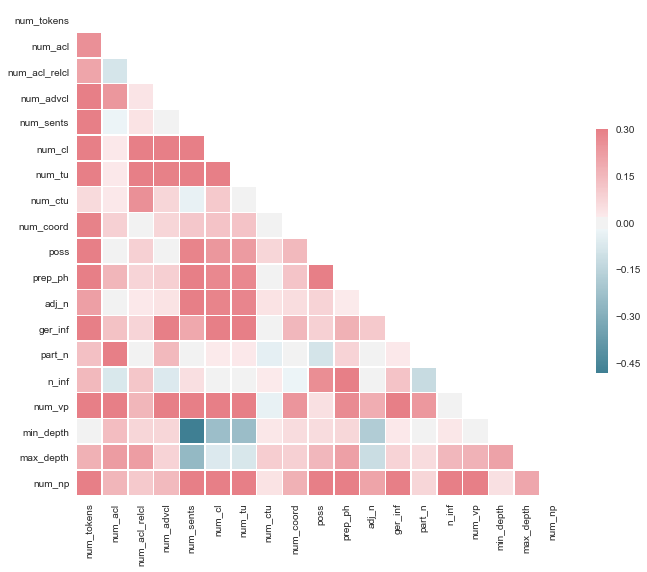

In [20]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_df_best_non.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

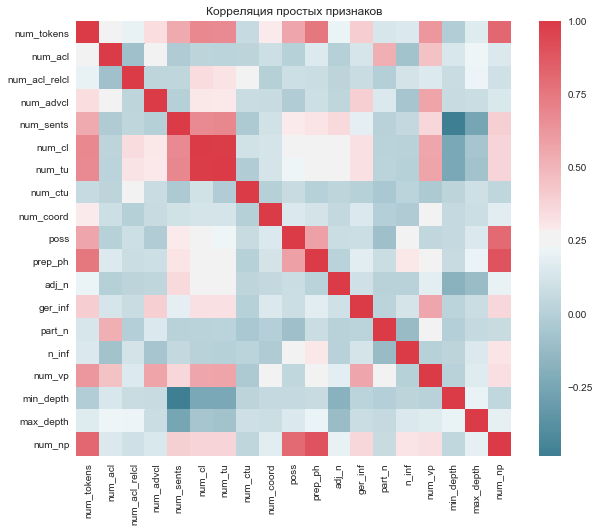

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Корреляция простых признаков')
plt.savefig('/Users/irene/Desktop/Курсовая/graphs/'+'correlation_simple.png')

# Разделение на тестовую и тренировочную выборку

In [22]:
from sklearn.model_selection import StratifiedKFold

In [24]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays )', "TEST (", len(test_index), 'essays )')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 844 essays ) TEST ( 212 essays )
TRAIN ( 845 essays ) TEST ( 211 essays )
TRAIN ( 845 essays ) TEST ( 211 essays )
TRAIN ( 845 essays ) TEST ( 211 essays )
TRAIN ( 845 essays ) TEST ( 211 essays )


# Дерево решений

In [25]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
y_pred = clf1.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.12      0.13      0.12        15
    nonbest       0.93      0.92      0.93       196

avg / total       0.88      0.87      0.87       211



In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.coolwarm):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

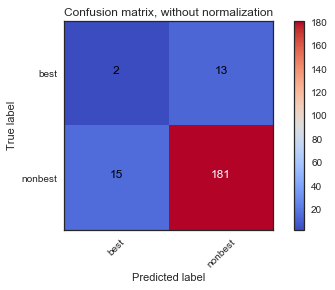

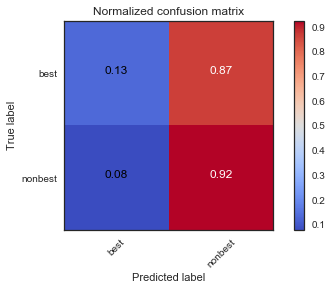

In [32]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [33]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.87


# Дерево решений с выбором лучших гиперпараметров

In [34]:
X_df_best_non.shape[1]

19

In [35]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [36]:
y_pred = clf1.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.38      0.33      0.36        15
    nonbest       0.95      0.96      0.95       196

avg / total       0.91      0.91      0.91       211



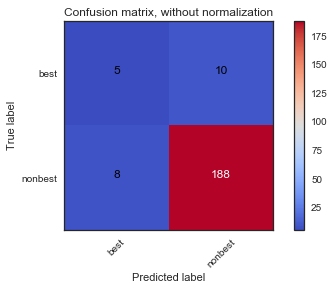

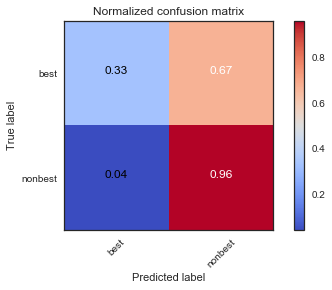

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [39]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.91


In [40]:
import collections

Feature ranking:
    importance   name_feature
10    0.164701        prep_ph
18    0.113245         num_np
12    0.104303        ger_inf
17    0.089104      max_depth
3     0.065101      num_advcl
1     0.061187        num_acl
14    0.057220          n_inf
0     0.048702     num_tokens
9     0.040689           poss
5     0.038674         num_cl
16    0.036944      min_depth
6     0.035946         num_tu
8     0.030579      num_coord
11    0.025908          adj_n
2     0.021418  num_acl_relcl
15    0.021038         num_vp
7     0.017383        num_ctu
4     0.016213      num_sents
13    0.011647         part_n


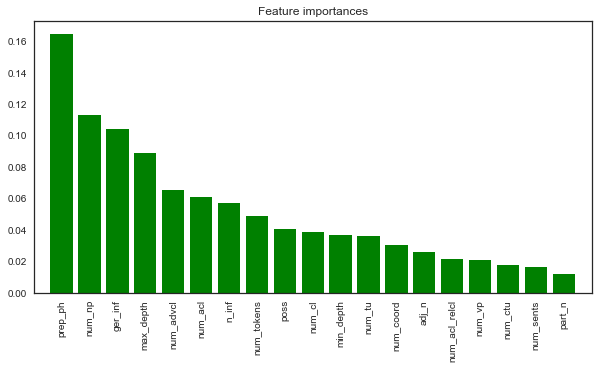

In [41]:
imp(clf1, X_df_best_non.columns)

In [42]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features']) 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=22, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [43]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
 
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
 
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('/Users/irene/Desktop/Курсовая/graphs/decision_tree1000_1.png')

True

# RandomForestClassifier

In [44]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_pred = clf2.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.00      0.00      0.00        15
    nonbest       0.93      0.99      0.96       196

avg / total       0.86      0.92      0.89       211



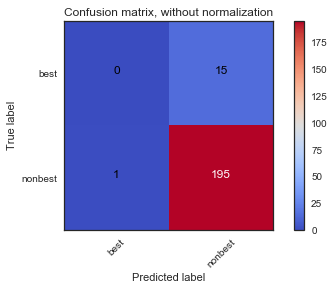

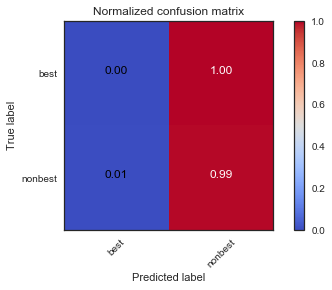

In [47]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [48]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.92


# RandomForestClassifier с выбором лучших гиперпараметров

In [49]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

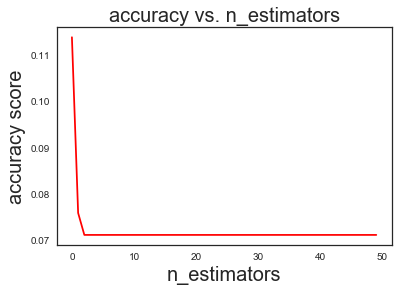

In [50]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [51]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=5, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 19), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [52]:
clf2.best_params_

{'max_depth': 15, 'max_features': 2}

In [53]:
y_pred = clf2.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.00      0.00      0.00        15
    nonbest       0.93      0.98      0.96       196

avg / total       0.86      0.91      0.89       211



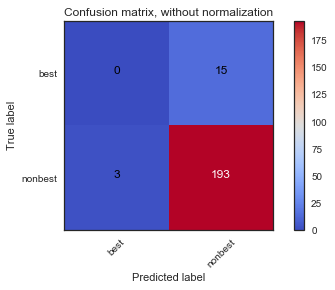

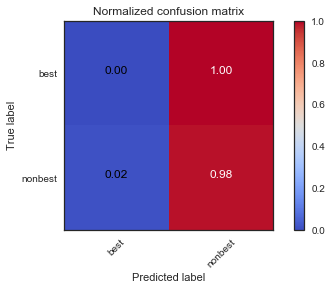

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [56]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.91


Feature ranking:
    importance   name_feature
10    0.100867        prep_ph
18    0.090262         num_np
15    0.085470         num_vp
1     0.073347        num_acl
0     0.072086     num_tokens
9     0.069935           poss
5     0.063021         num_cl
11    0.054648          adj_n
12    0.049444        ger_inf
6     0.047342         num_tu
4     0.046925      num_sents
3     0.046047      num_advcl
8     0.041878      num_coord
16    0.038067      min_depth
2     0.035179  num_acl_relcl
14    0.032178          n_inf
17    0.028099      max_depth
13    0.017833         part_n
7     0.007373        num_ctu


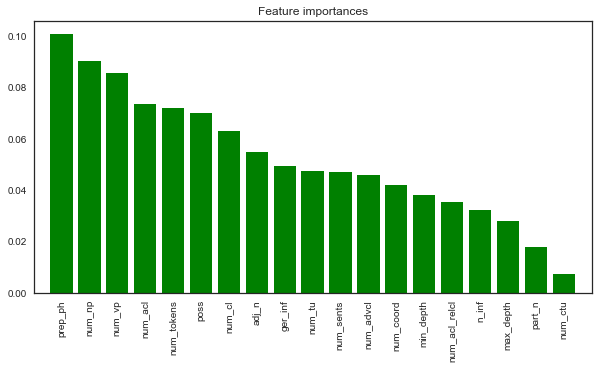

In [57]:
imp(clf2, X_df_best_non.columns)

# Разделение на три класса

In [88]:
df.head()

,name,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,...,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_worst_nonworst,mark_best_nonbest
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,aver,186,2,3,2,7,13,13,0,...,6,12,2,0,12,4,6,67,nonworst,nonbest
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,aver,195,4,2,1,10,14,14,0,...,1,3,1,0,17,3,8,60,nonworst,nonbest
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,best,271,5,1,3,11,23,23,0,...,3,6,3,1,19,2,8,66,nonworst,best
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,aver,218,3,0,1,10,14,14,0,...,3,2,0,0,12,3,11,78,nonworst,nonbest
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,aver,190,2,0,3,9,13,13,0,...,4,2,1,2,15,3,6,64,nonworst,nonbest


In [89]:
df_three = df.drop(['name', 'mark_best_nonbest', 'mark_worst_nonworst'], axis=1)

In [90]:
df_three.head()

,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,num_coord,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np
0,aver,186,2,3,2,7,13,13,0,1,13,34,6,12,2,0,12,4,6,67
1,aver,195,4,2,1,10,14,14,0,5,19,36,1,3,1,0,17,3,8,60
2,best,271,5,1,3,11,23,23,0,8,21,33,3,6,3,1,19,2,8,66
3,aver,218,3,0,1,10,14,14,0,4,27,46,3,2,0,0,12,3,11,78
4,aver,190,2,0,3,9,13,13,0,2,18,39,4,2,1,2,15,3,6,64


In [91]:
y = df_three.values[:, 0]

In [92]:
y

array(['aver', 'aver', 'best', ..., 'best', 'best', 'aver'], dtype=object)

In [93]:
X_three = df_three.drop(['grade2'], axis=1)
X_three[X_three.columns] = X_three[X_three.columns].astype(float)
X = X_three.values[:, 0:X_three.shape[1]]

In [94]:
X

array([[186.,   2.,   3., ...,   4.,   6.,  67.],
       [195.,   4.,   2., ...,   3.,   8.,  60.],
       [271.,   5.,   1., ...,   2.,   8.,  66.],
       ...,
       [138.,   1.,   1., ...,   3.,   8.,  44.],
       [223.,   0.,   0., ...,   2.,   6.,  88.],
       [149.,   2.,   0., ...,   2.,   6.,  47.]])

In [95]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)

5

In [96]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays )', "TEST (", len(test_index), 'essays )')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 843 essays ) TEST ( 213 essays )
TRAIN ( 844 essays ) TEST ( 212 essays )
TRAIN ( 845 essays ) TEST ( 211 essays )
TRAIN ( 846 essays ) TEST ( 210 essays )
TRAIN ( 846 essays ) TEST ( 210 essays )


# Дерево решений

In [114]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [115]:
y_pred = clf1.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.90      0.86      0.88       185
       best       0.19      0.20      0.19        15
      worst       0.22      0.40      0.29        10

avg / total       0.82      0.79      0.80       210



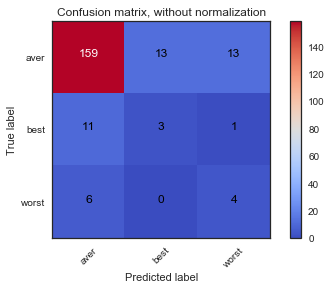

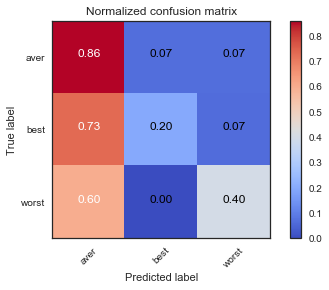

In [117]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [118]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.79


# Дерево решений с выбором лучших гиперпараметров

In [119]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [120]:
y_pred = clf1.predict(X_test)

In [121]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.89      0.85      0.87       185
       best       0.00      0.00      0.00        15
      worst       0.29      0.50      0.37        10

avg / total       0.80      0.78      0.78       210



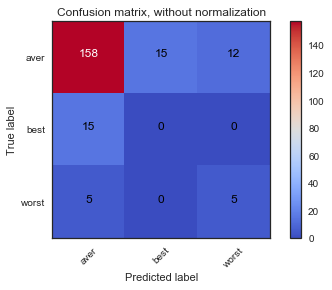

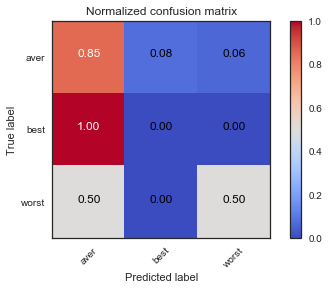

In [122]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [123]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.78


Feature ranking:
    importance   name_feature
0     0.282966     num_tokens
1     0.099499        num_acl
9     0.079885           poss
10    0.072114        prep_ph
17    0.060783      max_depth
18    0.057297         num_np
11    0.046713          adj_n
15    0.041298         num_vp
4     0.038785      num_sents
6     0.034466         num_tu
12    0.033642        ger_inf
3     0.031797      num_advcl
14    0.027752          n_inf
5     0.026155         num_cl
2     0.023450  num_acl_relcl
8     0.022585      num_coord
13    0.008220         part_n
16    0.006775      min_depth
7     0.005817        num_ctu


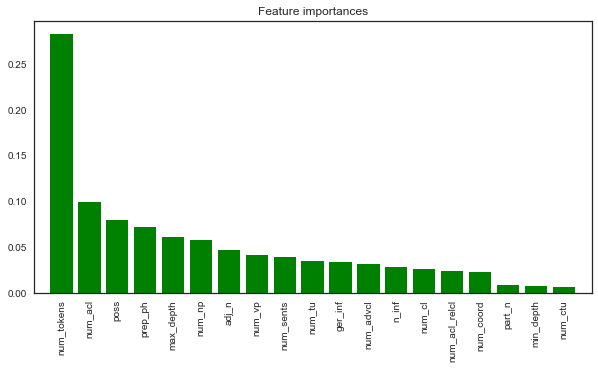

In [124]:
imp(clf1, X_three.columns)

In [125]:
clf1.best_params_

{'max_depth': 20, 'max_features': 16}

In [126]:
clf1 = DecisionTreeClassifier(max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features']) 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=16, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# RandomForestClassifier

In [127]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [128]:
y_pred = clf2.predict(X_test)

In [129]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       aver       0.90      0.99      0.94       185
       best       0.00      0.00      0.00        15
      worst       1.00      0.40      0.57        10

avg / total       0.84      0.90      0.86       210



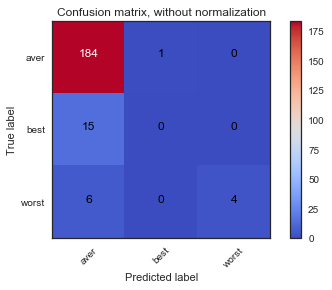

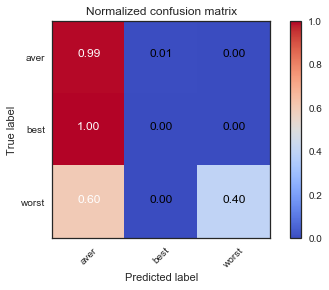

In [130]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [131]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.9


# RandomForestClassifier с выбором лучших гиперпараметров

In [132]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    elif x == 'worst':
        y_test_1.append(0)
    else:
        y_test_1.append(2)

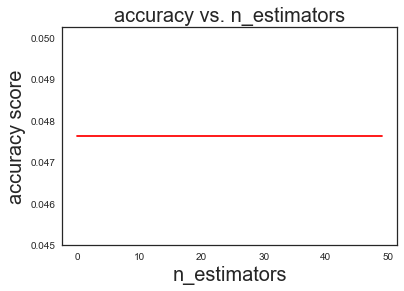

In [133]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=10, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [134]:
parameters = {
    'max_features': range(1, X_three.shape[1]),
    'max_depth' : range(1, 30),
}
clf_rfc = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf_rfc, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 19), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [135]:
y_pred = clf2.predict(X_test)

In [136]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       aver       0.90      0.98      0.94       185
       best       0.00      0.00      0.00        15
      worst       0.83      0.50      0.62        10

avg / total       0.83      0.89      0.86       210



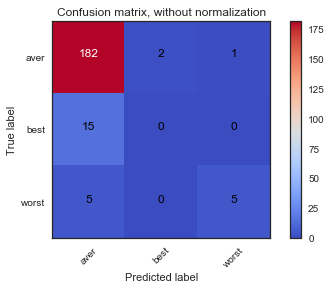

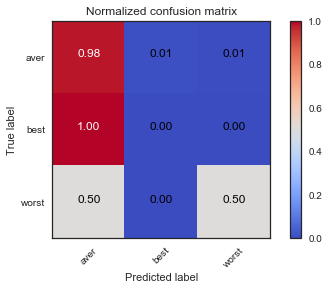

In [137]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [138]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.89


Feature ranking:
    importance   name_feature
0     0.140883     num_tokens
18    0.098908         num_np
10    0.097748        prep_ph
15    0.084212         num_vp
1     0.080263        num_acl
9     0.057502           poss
4     0.055054      num_sents
6     0.047153         num_tu
3     0.046844      num_advcl
5     0.044080         num_cl
8     0.038783      num_coord
12    0.036980        ger_inf
11    0.030994          adj_n
17    0.029167      max_depth
2     0.027318  num_acl_relcl
13    0.026790         part_n
14    0.026255          n_inf
16    0.019467      min_depth
7     0.011598        num_ctu


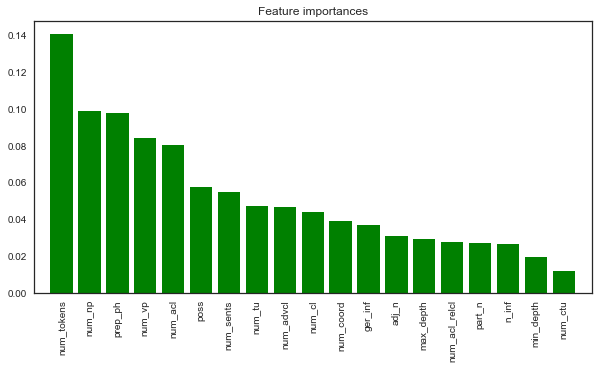

In [139]:
imp(clf2, X_three.columns)

# Worst vs nonworst

In [140]:
df.head()

,name,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,...,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_worst_nonworst,mark_best_nonbest
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,aver,186,2,3,2,7,13,13,0,...,6,12,2,0,12,4,6,67,nonworst,nonbest
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,aver,195,4,2,1,10,14,14,0,...,1,3,1,0,17,3,8,60,nonworst,nonbest
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,best,271,5,1,3,11,23,23,0,...,3,6,3,1,19,2,8,66,nonworst,best
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,aver,218,3,0,1,10,14,14,0,...,3,2,0,0,12,3,11,78,nonworst,nonbest
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,aver,190,2,0,3,9,13,13,0,...,4,2,1,2,15,3,6,64,nonworst,nonbest


In [141]:
df_worst_non = df.drop(['grade2', 'name', 'mark_best_nonbest'], axis=1)

In [142]:
y = df_worst_non.values[:, df_worst_non.shape[1]-1]

In [143]:
y

array(['nonworst', 'nonworst', 'nonworst', ..., 'nonworst', 'nonworst',
       'nonworst'], dtype=object)

In [144]:
X_worst = df_worst_non.drop(['mark_worst_nonworst'], axis=1)
X_worst[X_worst.columns] = X_worst[X_worst.columns].astype(float)
X = X_worst.values[:, 0:X_worst.shape[1]]

In [145]:
skf = StratifiedKFold(n_splits=2, shuffle=False, random_state=0)
skf.get_n_splits(X, y)

2

In [146]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays )', "TEST (", len(test_index), 'essays )')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 528 essays ) TEST ( 528 essays )
TRAIN ( 528 essays ) TEST ( 528 essays )


# Дерево решений

In [147]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

             precision    recall  f1-score   support

   nonworst       0.97      0.96      0.96       502
      worst       0.37      0.50      0.43        26

avg / total       0.94      0.93      0.94       528



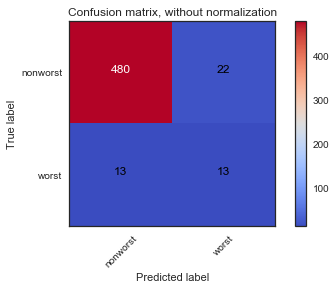

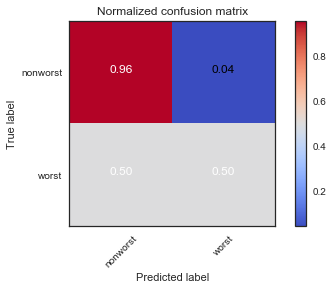

Accuracy:  0.93


In [148]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# Дерево решений с подбором лучших гиперпараметров

In [149]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

   nonworst       0.96      0.96      0.96       502
      worst       0.28      0.27      0.27        26

avg / total       0.93      0.93      0.93       528



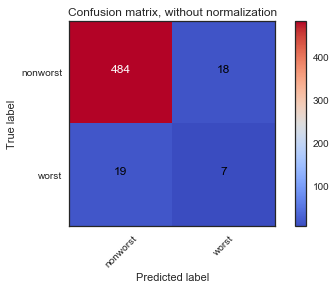

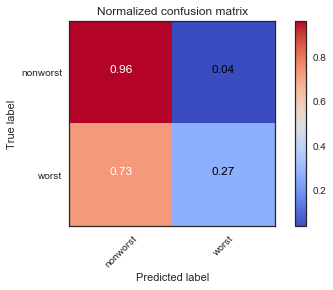

Accuracy:  0.93


In [150]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance   name_feature
10    0.208039        prep_ph
4     0.100381      num_sents
9     0.097836           poss
11    0.087272          adj_n
0     0.076976     num_tokens
17    0.070732      max_depth
3     0.070273      num_advcl
6     0.056617         num_tu
18    0.039840         num_np
15    0.035440         num_vp
5     0.033150         num_cl
12    0.029622        ger_inf
2     0.025790  num_acl_relcl
1     0.024696        num_acl
13    0.024154         part_n
16    0.011647      min_depth
14    0.007535          n_inf
7     0.000000        num_ctu
8     0.000000      num_coord


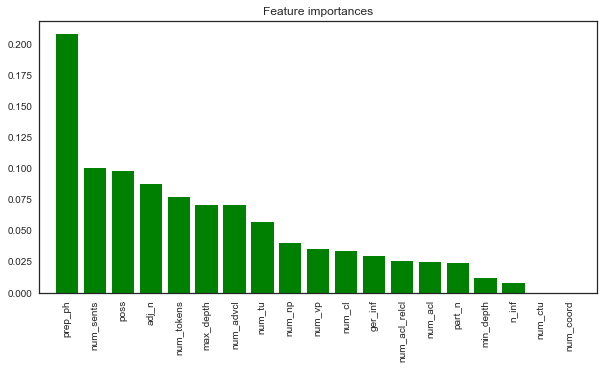

In [151]:
imp(clf1, X_worst.columns)

In [152]:
clf1.best_params_

{'max_depth': 15, 'max_features': 2}

In [153]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features'])
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=15, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

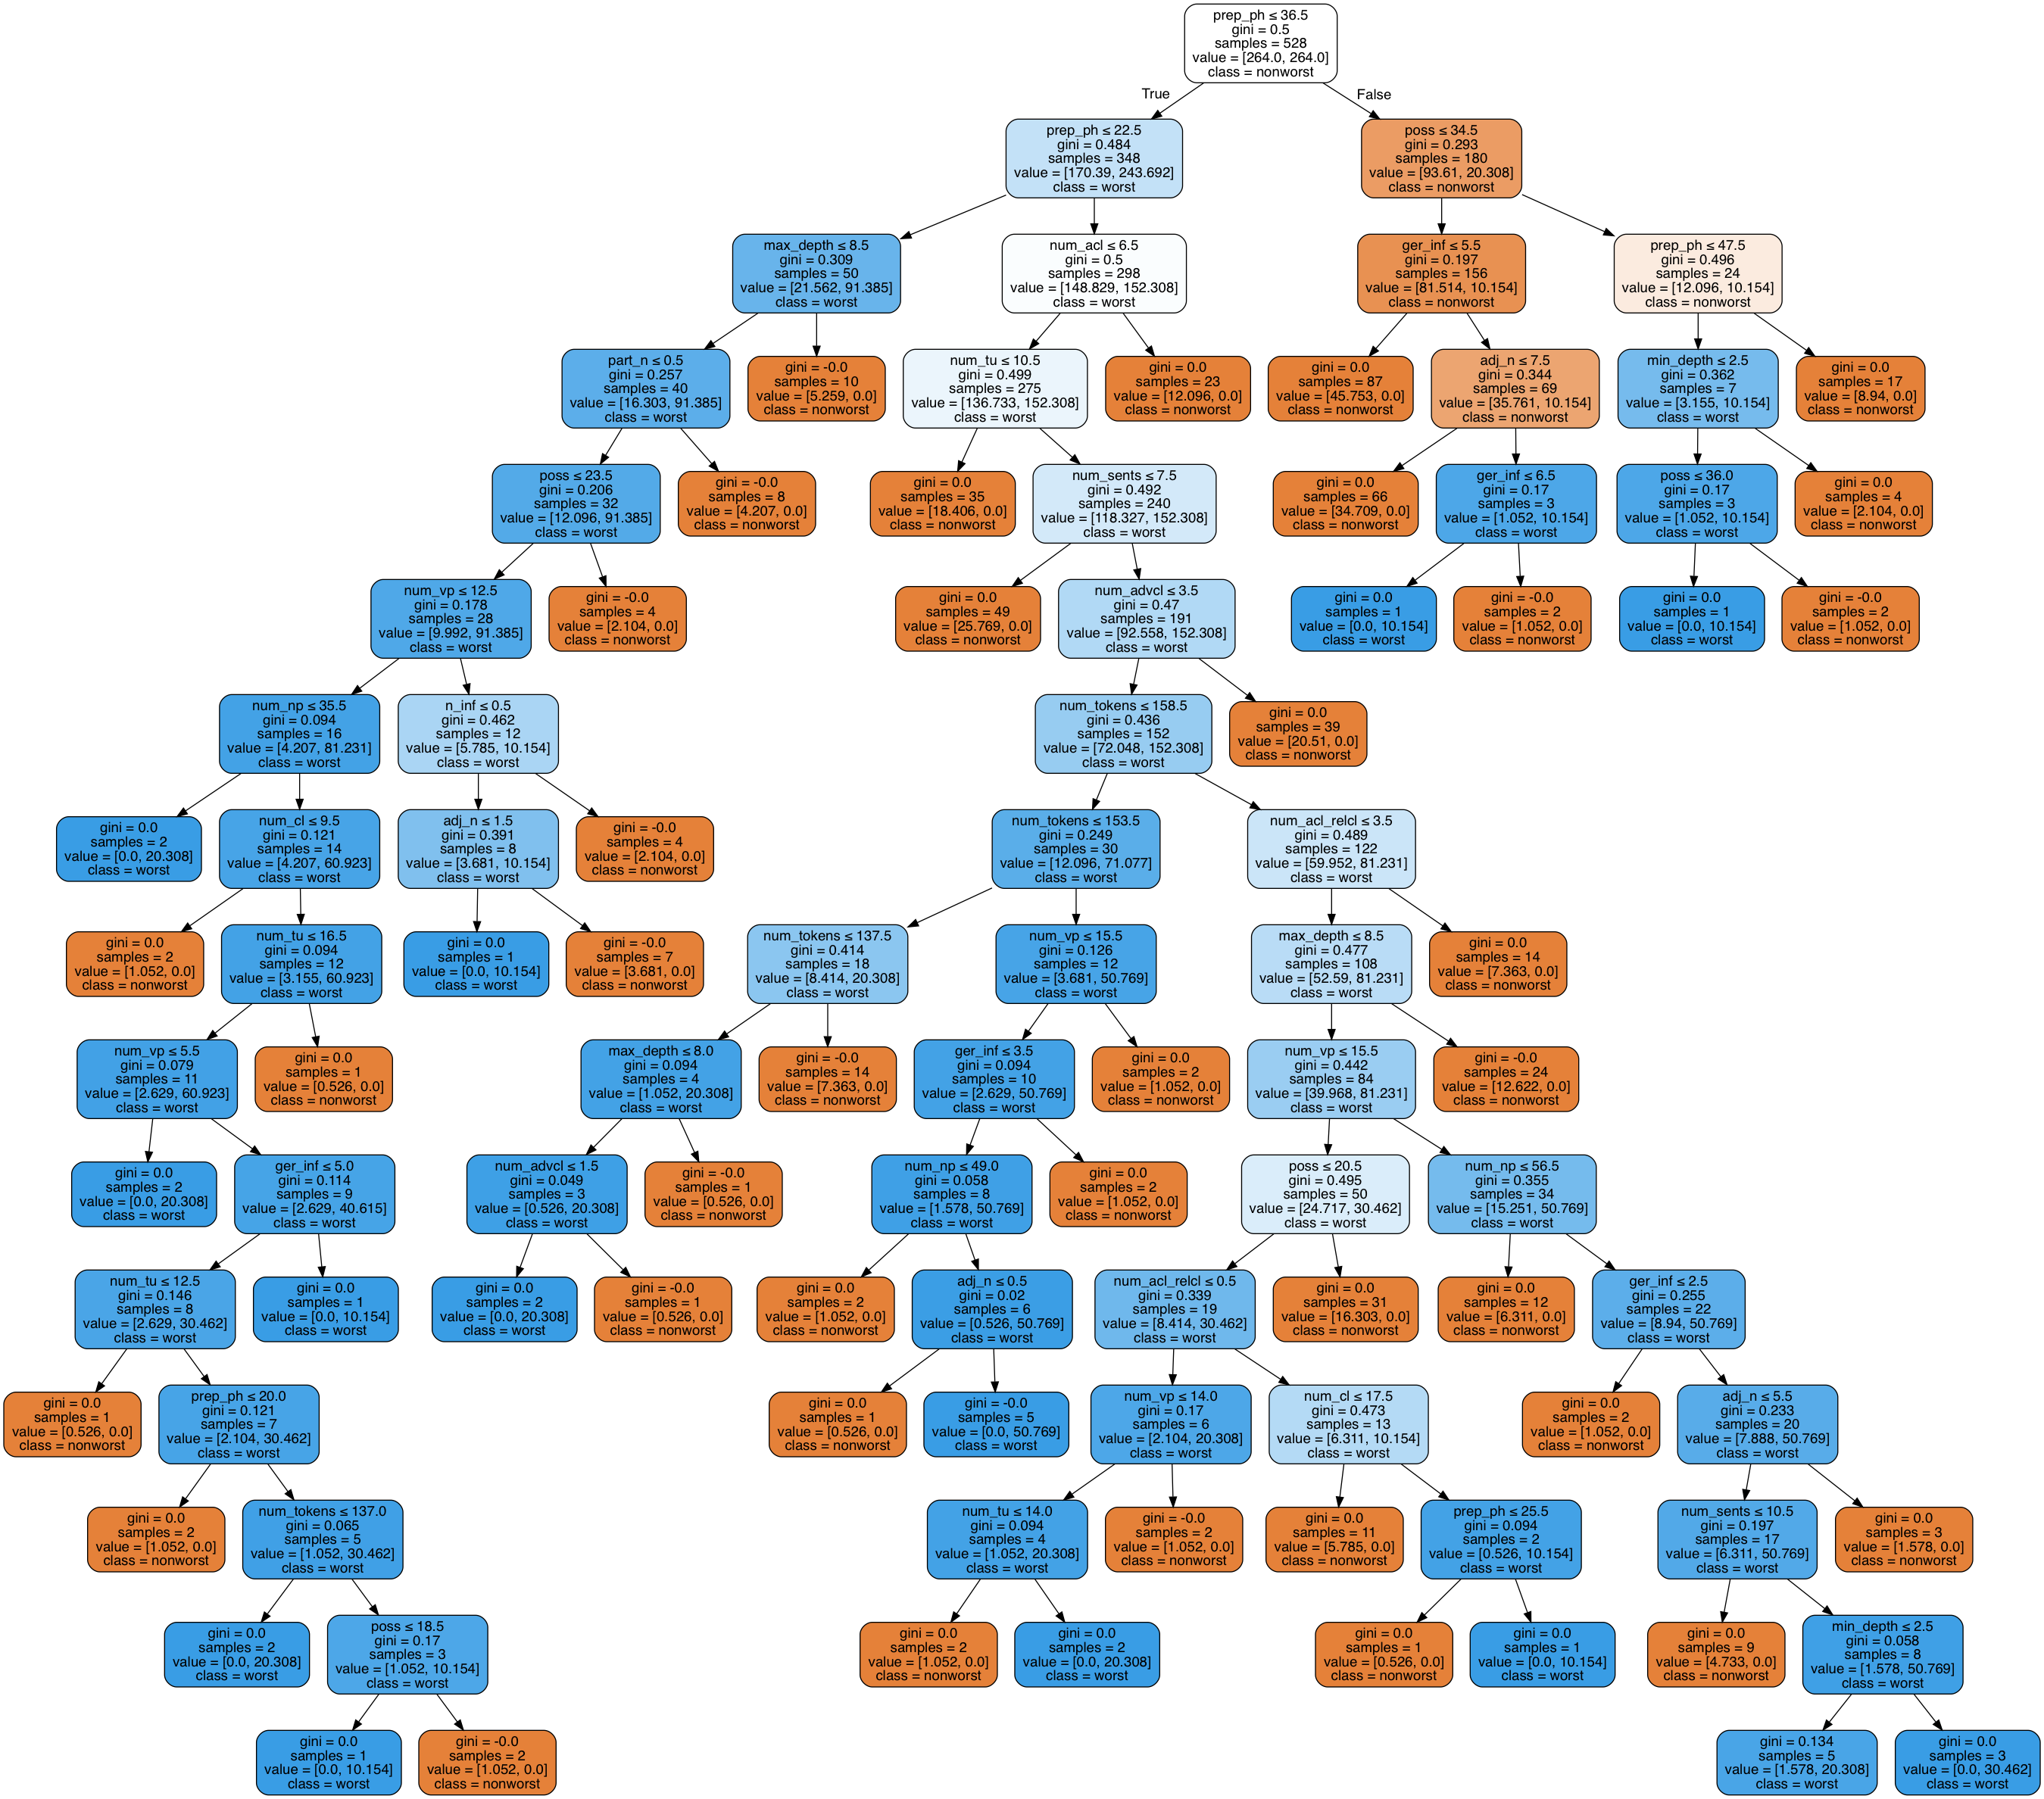

In [154]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# RandomForestClassifier

In [155]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

             precision    recall  f1-score   support

   nonworst       0.97      1.00      0.98       502
      worst       0.82      0.35      0.49        26

avg / total       0.96      0.96      0.96       528



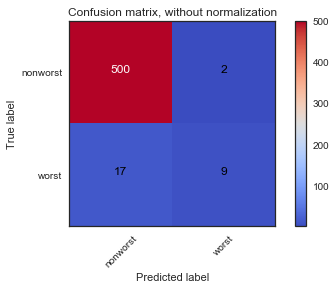

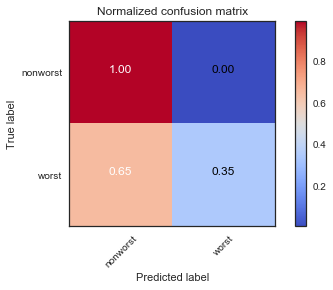

Accuracy:  0.96


In [156]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# RandomForestClassifier c выбором лучших гиперпараметров

In [157]:
y_test_1 = []
for x in y_test:
    if x == 'worst':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

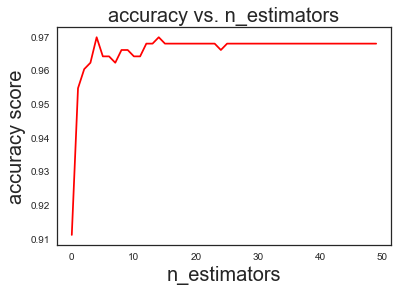

In [158]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [160]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=30, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 19), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

   nonworst       0.97      0.98      0.98       502
      worst       0.58      0.42      0.49        26

avg / total       0.95      0.96      0.95       528



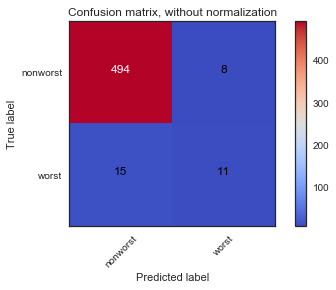

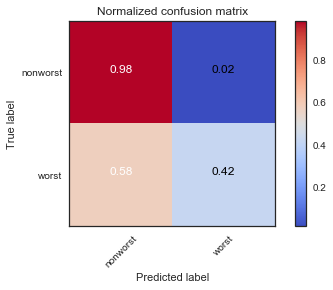

Accuracy:  0.96


In [161]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance   name_feature
0     0.136918     num_tokens
17    0.097935      max_depth
10    0.080325        prep_ph
15    0.079340         num_vp
4     0.064379      num_sents
3     0.063010      num_advcl
18    0.060571         num_np
9     0.060305           poss
8     0.052086      num_coord
12    0.046899        ger_inf
1     0.045315        num_acl
5     0.043345         num_cl
6     0.036345         num_tu
11    0.032025          adj_n
2     0.031945  num_acl_relcl
16    0.029008      min_depth
14    0.018674          n_inf
13    0.016765         part_n
7     0.004809        num_ctu


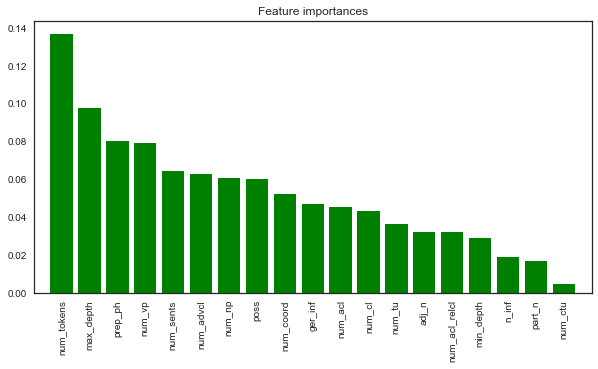

In [162]:
imp(clf2, X_worst.columns)

# Важность признаков

In [170]:
def imp(clf_grid, feature_names):
    importances = clf_grid.best_estimator_.feature_importances_
    #print(clf_grid.best_estimator_)
    if isinstance(clf_grid.best_estimator_, collections.Iterable):
        std = np.std([clf_grid.best_estimator_.feature_importances_ for tree in clf_grid.best_estimator_],
             axis=0)
    else:
        std = clf1.best_estimator_.feature_importances_
    #print(std)
    indices = np.argsort(importances)[::-1]
    d = {'importance': importances, 'name_feature': feature_names}
    
    # Print the feature ranking
    df_importance = pd.DataFrame(data=d)
    df_importance = df_importance.sort_values(by=['importance'], ascending=False)
    print("Feature ranking:")

    print(df_importance)

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="g")
    plt.xticks(range(X.shape[1]), df_importance['name_feature'], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

# Со сложными признаками

In [171]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures1000_1.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [172]:
df[['name', 'grade1', 'grade2', 'av_depth', 'mean_l_sim', 'mean_p_sim', 'mean_l_sim_nei', 'mean_p_sim_nei',
'mean_length_s', 'mean_length_c', 'c_s', 'c_t',
'acl_t', 'acl_relcl_t', 'advcl_t', 'acl_cl', 'acl_relcl_cl', 'advcl_cl',
'coord_cl', 't_s', 'poss_s', 'prep_s', 'adj_n_s', 'ger_inf_s', 'part_n_s', 'n_inf_s',
'vp_s', 'mean_tokens_root', 'nan']] = df['h'].str.split('\t',expand=True)

In [173]:
df.head()

,h,name,grade1,grade2,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,...,t_s,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,n_inf_s,vp_s,mean_tokens_root,nan
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1....,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,55,aver,5.14,31.14,24.76,33.0,26.0,26.57,...,1.857,1.857,4.857,0.857,1.714,0.286,0.0,1.714,7.14,
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1....,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,50,aver,4.7,21.42,16.82,22.78,17.44,19.5,...,1.4,1.9,3.6,0.1,0.3,0.1,0.0,1.7,6.2,
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1....,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,75,best,4.27,32.36,26.07,31.4,25.2,24.64,...,2.091,1.909,3.0,0.273,0.545,0.273,0.091,1.727,7.82,
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1....,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,55,aver,4.9,24.18,18.98,25.0,20.22,21.8,...,1.4,2.7,4.6,0.3,0.2,0.0,0.0,1.2,6,
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1....,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,60,aver,4.44,23.31,17.03,22.38,16.5,21.11,...,1.444,2.0,4.333,0.444,0.222,0.111,0.222,1.667,5,


In [174]:
df = df.drop(['h','nan', 'grade1'], axis=1)

In [175]:
df.head()

,name,grade2,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,c_s,...,coord_cl,t_s,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,n_inf_s,vp_s,mean_tokens_root
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,aver,5.14,31.14,24.76,33.0,26.0,26.57,14.308,1.857,...,0.077,1.857,1.857,4.857,0.857,1.714,0.286,0.0,1.714,7.14
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,aver,4.7,21.42,16.82,22.78,17.44,19.5,13.929,1.4,...,0.357,1.4,1.9,3.6,0.1,0.3,0.1,0.0,1.7,6.2
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,best,4.27,32.36,26.07,31.4,25.2,24.64,11.783,2.091,...,0.348,2.091,1.909,3.0,0.273,0.545,0.273,0.091,1.727,7.82
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,aver,4.9,24.18,18.98,25.0,20.22,21.8,15.571,1.4,...,0.286,1.4,2.7,4.6,0.3,0.2,0.0,0.0,1.2,6
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,aver,4.44,23.31,17.03,22.38,16.5,21.11,14.615,1.444,...,0.154,1.444,2.0,4.333,0.444,0.222,0.111,0.222,1.667,5


In [176]:
def best_non(row):
    if row['grade2'] == 'best':
        val = 'best'
    else:
        val = 'nonbest'
    return val

def worst_non(row):
    if row['grade2'] == 'worst':
        val = 'worst'
    else:
        val = 'nonworst'
    return val

df['mark_worst_nonworst'] = df.apply(worst_non, axis=1)
df['mark_best_nonbest'] = df.apply(best_non, axis=1)

In [177]:
df.head()

,name,grade2,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,c_s,...,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,n_inf_s,vp_s,mean_tokens_root,mark_worst_nonworst,mark_best_nonbest
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,aver,5.14,31.14,24.76,33.0,26.0,26.57,14.308,1.857,...,1.857,4.857,0.857,1.714,0.286,0.0,1.714,7.14,nonworst,nonbest
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,aver,4.7,21.42,16.82,22.78,17.44,19.5,13.929,1.4,...,1.9,3.6,0.1,0.3,0.1,0.0,1.7,6.2,nonworst,nonbest
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,best,4.27,32.36,26.07,31.4,25.2,24.64,11.783,2.091,...,1.909,3.0,0.273,0.545,0.273,0.091,1.727,7.82,nonworst,best
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,aver,4.9,24.18,18.98,25.0,20.22,21.8,15.571,1.4,...,2.7,4.6,0.3,0.2,0.0,0.0,1.2,6,nonworst,nonbest
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,aver,4.44,23.31,17.03,22.38,16.5,21.11,14.615,1.444,...,2.0,4.333,0.444,0.222,0.111,0.222,1.667,5,nonworst,nonbest


In [178]:
df_best_non = df.drop(['grade2', 'name', 'mark_worst_nonworst'], axis=1)
y = df_best_non.values[:, df_best_non.shape[1]-1]
X_df_best_non = df_best_non.drop(['mark_best_nonbest'], axis=1)
X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]

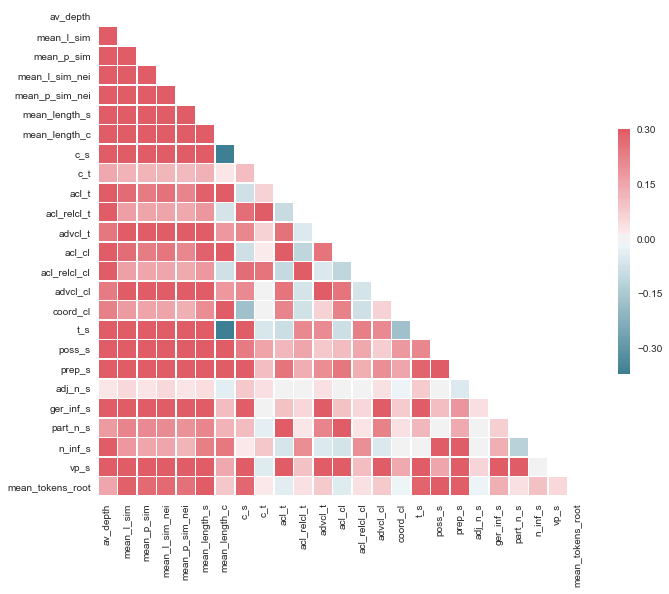

In [179]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_df_best_non.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

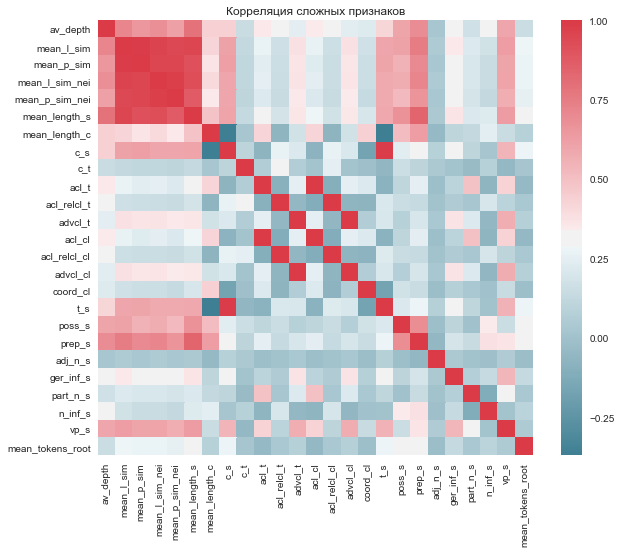

In [180]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Корреляция сложных признаков')
plt.savefig('/Users/irene/Desktop/Курсовая/graphs/'+'correlation_complex.png')

In [181]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays )', "TEST (", len(test_index), 'essays )')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 844 essays ) TEST ( 212 essays )
TRAIN ( 845 essays ) TEST ( 211 essays )
TRAIN ( 845 essays ) TEST ( 211 essays )
TRAIN ( 845 essays ) TEST ( 211 essays )
TRAIN ( 845 essays ) TEST ( 211 essays )


# Дерево решений

             precision    recall  f1-score   support

       best       0.10      0.13      0.11        15
    nonbest       0.93      0.91      0.92       196

avg / total       0.87      0.85      0.86       211



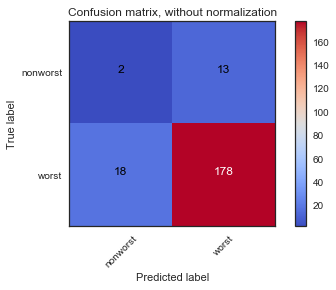

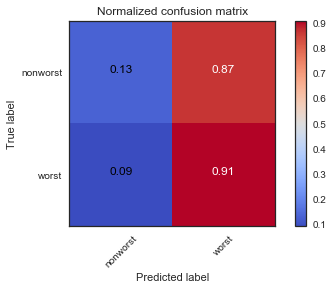

Accuracy:  0.85


In [182]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
17    0.096285            poss_s
18    0.075009            prep_s
12    0.071208            acl_cl
11    0.070674           advcl_t
6     0.066076     mean_length_c
15    0.063397          coord_cl
1     0.063055        mean_l_sim
10    0.061545       acl_relcl_t
20    0.058102         ger_inf_s
16    0.049513               t_s
14    0.045566          advcl_cl
5     0.040881     mean_length_s
9     0.038199             acl_t
22    0.030009           n_inf_s
23    0.027028              vp_s
21    0.026021          part_n_s
13    0.023153      acl_relcl_cl
24    0.020283  mean_tokens_root
8     0.019521               c_t
7     0.017577               c_s
2     0.008951        mean_p_sim
19    0.007362           adj_n_s
3     0.007304    mean_l_sim_nei
4     0.007292    mean_p_sim_nei
0     0.005989          av_depth


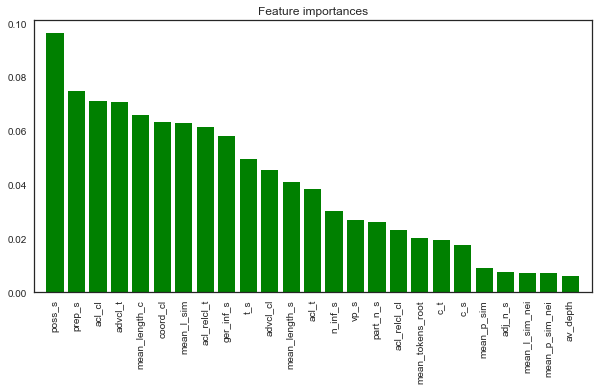

In [183]:
imp(clf1, X_df_best_non.columns)

In [184]:
clf1.best_params_

{'max_depth': 17, 'max_features': 10}

In [185]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=clf1.best_params_['max_depth'], max_features=clf1.best_params_['max_features']) 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=17, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

# RandomForestClassifier

In [186]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

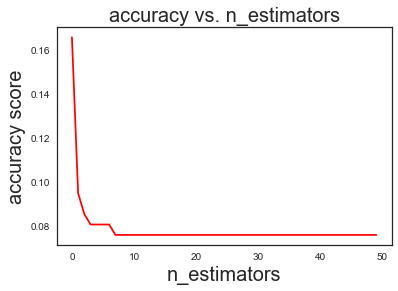

In [187]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [188]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 25), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

       best       0.00      0.00      0.00        15
    nonbest       0.93      0.99      0.96       196

avg / total       0.86      0.92      0.89       211



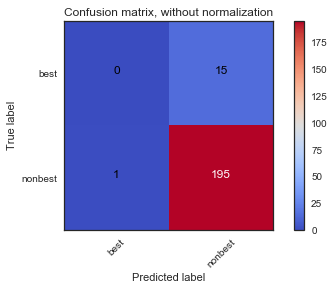

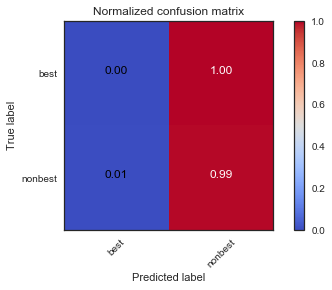

Accuracy:  0.92


In [189]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
14    0.086185          advcl_cl
17    0.066480            poss_s
9     0.062379             acl_t
12    0.055977            acl_cl
0     0.050676          av_depth
4     0.050319    mean_p_sim_nei
23    0.046402              vp_s
5     0.046389     mean_length_s
2     0.041934        mean_p_sim
16    0.041913               t_s
15    0.041252          coord_cl
6     0.038319     mean_length_c
24    0.036294  mean_tokens_root
13    0.035309      acl_relcl_cl
20    0.034027         ger_inf_s
19    0.033694           adj_n_s
22    0.033502           n_inf_s
11    0.033474           advcl_t
10    0.030726       acl_relcl_t
3     0.027213    mean_l_sim_nei
7     0.025432               c_s
1     0.025021        mean_l_sim
18    0.019334            prep_s
21    0.018997          part_n_s
8     0.018751               c_t


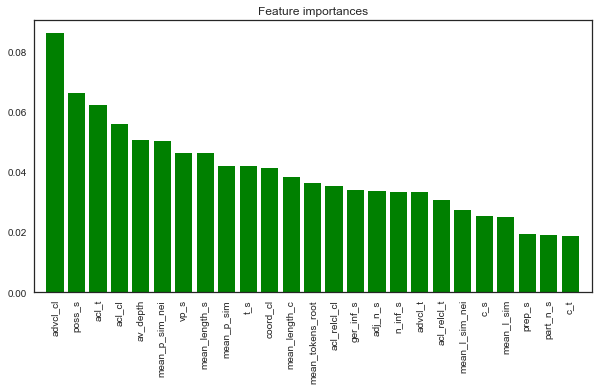

In [190]:
imp(clf2, X_df_best_non.columns)

# Всё в куче

In [196]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures1000_1.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [197]:
df2 = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures_simple1000_1.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [198]:
df[['name', 'grade1', 'grade2', 'av_depth', 'mean_l_sim', 'mean_p_sim', 'mean_l_sim_nei', 'mean_p_sim_nei',
'mean_length_s', 'mean_length_c', 'c_s', 'c_t',
'acl_t', 'acl_relcl_t', 'advcl_t', 'acl_cl', 'acl_relcl_cl', 'advcl_cl',
'coord_cl', 't_s', 'poss_s', 'prep_s', 'adj_n_s', 'ger_inf_s', 'part_n_s', 'n_inf_s',
'vp_s', 'mean_tokens_root', 'nan']] = df['h'].str.split('\t',expand=True)

In [199]:
df2[['name', 'grade1', 'grade2', 'num_tokens', 'num_acl', 'num_acl_relcl', 'num_advcl',
'num_sents', 'num_cl', 'num_tu', 'num_ctu',
'num_coord', 'poss', 'prep_ph', 'adj_n', 'ger_inf',
'part_n', 'n_inf', 'num_vp',
'min_depth', 'max_depth', 'num_np', 'nan']] = df2['h'].str.split('\t',expand=True)

In [200]:
df = df.drop(['h','nan', 'grade1'], axis=1)

In [201]:
df.head()

,name,grade2,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,c_s,...,coord_cl,t_s,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,n_inf_s,vp_s,mean_tokens_root
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,aver,5.14,31.14,24.76,33.0,26.0,26.57,14.308,1.857,...,0.077,1.857,1.857,4.857,0.857,1.714,0.286,0.0,1.714,7.14
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,aver,4.7,21.42,16.82,22.78,17.44,19.5,13.929,1.4,...,0.357,1.4,1.9,3.6,0.1,0.3,0.1,0.0,1.7,6.2
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,best,4.27,32.36,26.07,31.4,25.2,24.64,11.783,2.091,...,0.348,2.091,1.909,3.0,0.273,0.545,0.273,0.091,1.727,7.82
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,aver,4.9,24.18,18.98,25.0,20.22,21.8,15.571,1.4,...,0.286,1.4,2.7,4.6,0.3,0.2,0.0,0.0,1.2,6
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,aver,4.44,23.31,17.03,22.38,16.5,21.11,14.615,1.444,...,0.154,1.444,2.0,4.333,0.444,0.222,0.111,0.222,1.667,5


In [202]:
df2 = df2.drop(['h','nan', 'grade1', 'grade2', 'name'], axis=1)

In [203]:
df2.head()

,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,num_coord,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np
0,186,2,3,2,7,13,13,0,1,13,34,6,12,2,0,12,4,6,67
1,195,4,2,1,10,14,14,0,5,19,36,1,3,1,0,17,3,8,60
2,271,5,1,3,11,23,23,0,8,21,33,3,6,3,1,19,2,8,66
3,218,3,0,1,10,14,14,0,4,27,46,3,2,0,0,12,3,11,78
4,190,2,0,3,9,13,13,0,2,18,39,4,2,1,2,15,3,6,64


In [204]:
result = pd.concat([df, df2], axis=1)

In [205]:
result.head()

,name,grade2,av_depth,mean_l_sim,mean_p_sim,mean_l_sim_nei,mean_p_sim_nei,mean_length_s,mean_length_c,c_s,...,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,aver,5.14,31.14,24.76,33.0,26.0,26.57,14.308,1.857,...,13,34,6,12,2,0,12,4,6,67
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,aver,4.7,21.42,16.82,22.78,17.44,19.5,13.929,1.4,...,19,36,1,3,1,0,17,3,8,60
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,best,4.27,32.36,26.07,31.4,25.2,24.64,11.783,2.091,...,21,33,3,6,3,1,19,2,8,66
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,aver,4.9,24.18,18.98,25.0,20.22,21.8,15.571,1.4,...,27,46,3,2,0,0,12,3,11,78
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,aver,4.44,23.31,17.03,22.38,16.5,21.11,14.615,1.444,...,18,39,4,2,1,2,15,3,6,64


In [206]:
def best_non(row):
    if row['grade2'] == 'best':
        val = 'best'
    else:
        val = 'nonbest'
    return val

def worst_non(row):
    if row['grade2'] == 'worst':
        val = 'worst'
    else:
        val = 'nonworst'
    return val

result['mark_worst_nonworst'] = result.apply(worst_non, axis=1)
result['mark_best_nonbest'] = result.apply(best_non, axis=1)

In [207]:
df_best_non = result.drop(['grade2', 'name', 'mark_worst_nonworst'], axis=1)
y = df_best_non.values[:, df_best_non.shape[1]-1]
X_df_best_non = df_best_non.drop(['mark_best_nonbest'], axis=1)
X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]

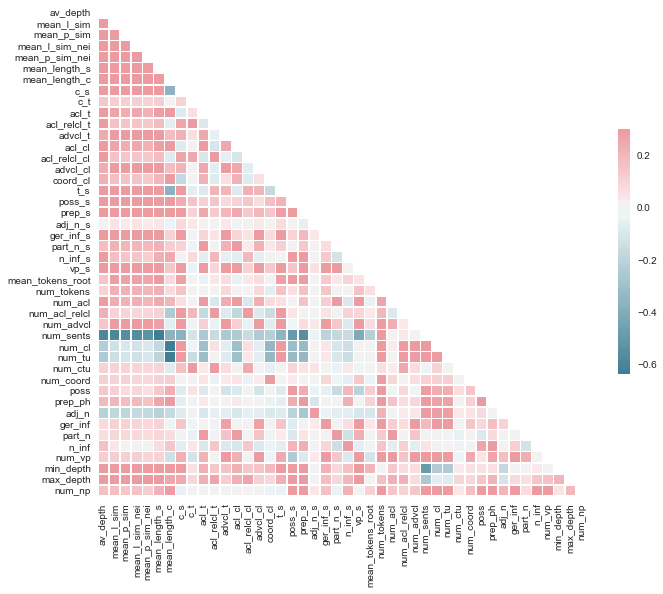

In [208]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_df_best_non.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

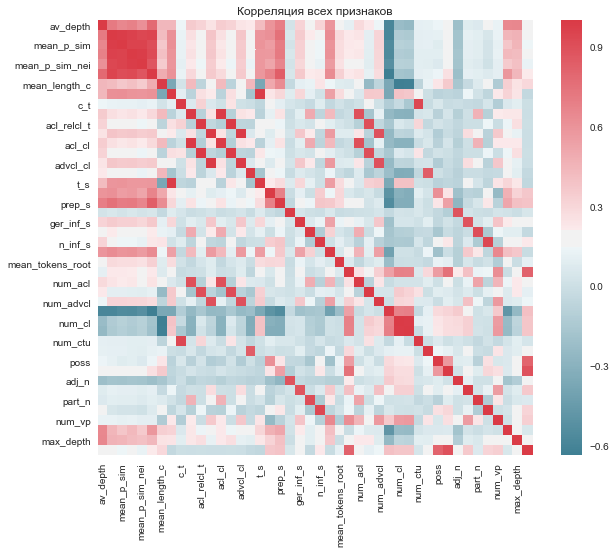

In [209]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Корреляция всех признаков')
plt.savefig('/Users/irene/Desktop/Курсовая/graphs/'+'correlation_all.png')

In [210]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays )', "TEST (", len(test_index), 'essays )')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 844 essays ) TEST ( 212 essays )
TRAIN ( 845 essays ) TEST ( 211 essays )
TRAIN ( 845 essays ) TEST ( 211 essays )
TRAIN ( 845 essays ) TEST ( 211 essays )
TRAIN ( 845 essays ) TEST ( 211 essays )


# Дерево решений

             precision    recall  f1-score   support

       best       0.07      0.07      0.07        15
    nonbest       0.93      0.93      0.93       196

avg / total       0.87      0.87      0.87       211



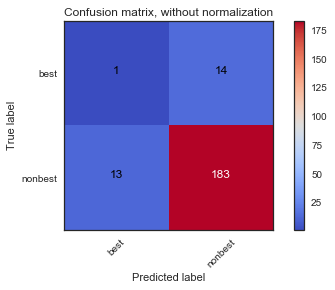

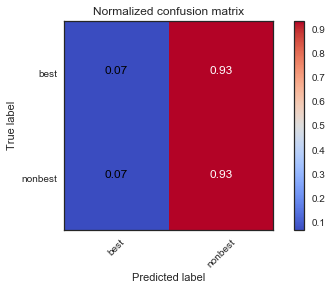

Accuracy:  0.87


In [211]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
35    0.142234           prep_ph
26    0.135191           num_acl
16    0.073433               t_s
25    0.048941        num_tokens
28    0.042874         num_advcl
15    0.041062          coord_cl
6     0.038602     mean_length_c
9     0.034460             acl_t
0     0.034134          av_depth
23    0.033622              vp_s
13    0.032634      acl_relcl_cl
17    0.029044            poss_s
20    0.028429         ger_inf_s
4     0.026490    mean_p_sim_nei
24    0.025712  mean_tokens_root
3     0.024359    mean_l_sim_nei
14    0.021258          advcl_cl
42    0.020682         max_depth
7     0.020392               c_s
11    0.019343           advcl_t
18    0.016267            prep_s
22    0.015958           n_inf_s
37    0.015864           ger_inf
21    0.013110          part_n_s
19    0.011519           adj_n_s
39    0.010481             n_inf
34    0.009211              poss
8     0.008532               c_t
33    0.007735         num

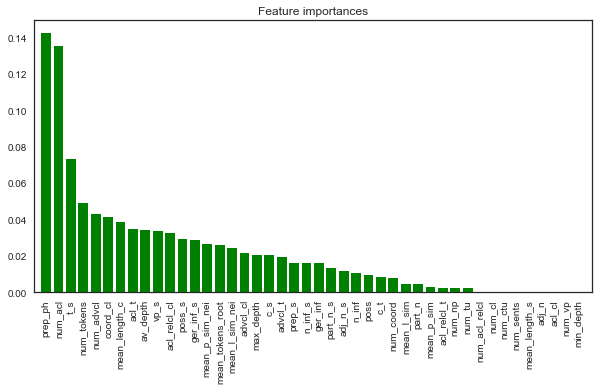

In [212]:
imp(clf1, X_df_best_non.columns)

# Лес решений

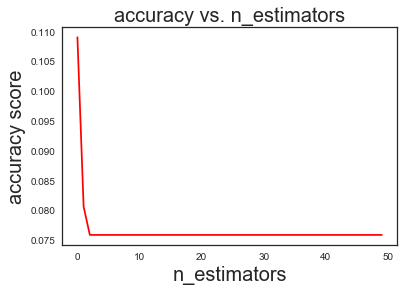

In [213]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(0)
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [214]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=5, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 44), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

       best       0.14      0.07      0.09        15
    nonbest       0.93      0.97      0.95       196

avg / total       0.88      0.91      0.89       211



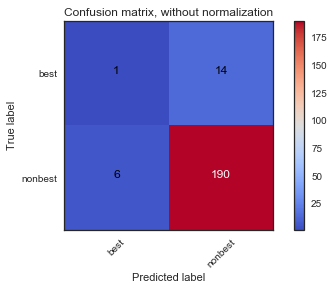

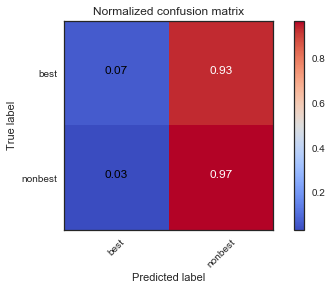

Accuracy:  0.91


In [215]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
25    0.071228        num_tokens
26    0.068098           num_acl
40    0.057838            num_vp
35    0.057572           prep_ph
22    0.055565           n_inf_s
43    0.049984            num_np
42    0.040683         max_depth
4     0.037392    mean_p_sim_nei
10    0.035811       acl_relcl_t
9     0.034360             acl_t
17    0.034317            poss_s
11    0.030989           advcl_t
28    0.030496         num_advcl
14    0.026109          advcl_cl
19    0.025431           adj_n_s
5     0.024077     mean_length_s
6     0.023681     mean_length_c
23    0.022299              vp_s
15    0.021126          coord_cl
34    0.021088              poss
30    0.018752            num_cl
18    0.016443            prep_s
36    0.015317             adj_n
24    0.014398  mean_tokens_root
38    0.014199            part_n
7     0.013814               c_s
12    0.012490            acl_cl
27    0.012438     num_acl_relcl
20    0.012394         ger

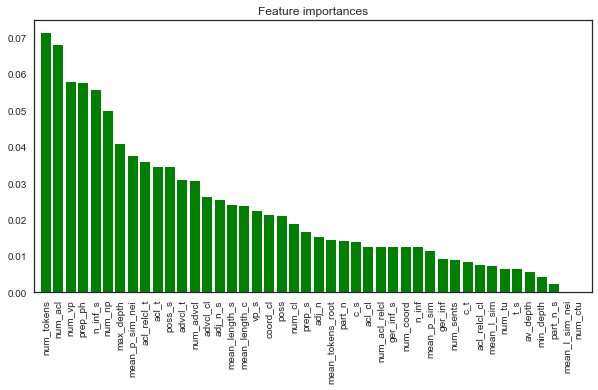

In [216]:
imp(clf2, X_df_best_non.columns)